In [12]:
%load_ext rpy2.ipython


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [14]:
%%R
library(data.table)

gmIDs <- c(
    "3a116996-93a9-11ee-956e-9da2d070324c"
    #,"feaf2ba8-d28d-11ee-b437-336917683bb8"
           )
print(gmIDs)


[1] "3a116996-93a9-11ee-956e-9da2d070324c"


In [16]:
%%R

df_chassis <- data.frame()
df_pose <- data.frame()

for (id in gmIDs) {
    
    print(id)
    temp_chassis <- read.csv(sprintf("./data/Raw_Data/%s/_apollo_canbus_chassis/%s_apollo_canbus_chassis.csv", id, id))
    temp_pose <- read.csv(sprintf("./data/Raw_Data/%s/_apollo_sensor_gnss_best_pose/%s_apollo_sensor_gnss_best_pose.csv", id, id))
    
    df_chassis <- rbind(df_chassis, temp_chassis)
    df_pose <- rbind(df_pose, temp_pose)
}

print("done loading data")


[1] "3a116996-93a9-11ee-956e-9da2d070324c"
[1] "done loading data"


In [19]:
%%R

binary_driving_mode <- function(df_chassis) {
  result <- ifelse(df_chassis$drivingMode == "COMPLETE_AUTO_DRIVE", 1,0)
  
  return (result)
}

In [20]:
%%R
#print(dim(df_chassis))
#print(dim(df_pose))


df_chassis$binaryDrivingMode <- binary_driving_mode(df_chassis)

In [21]:
%%R

summary(df_chassis$binaryDrivingMode)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 


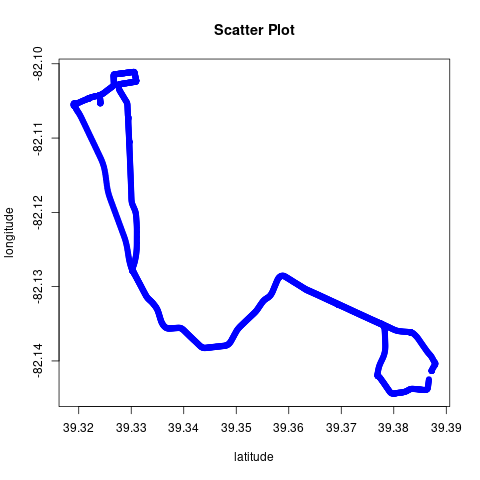

In [23]:
%%R

# Create a scatter plot
plot(df_pose$latitude, df_pose$longitude, 
     main = "Scatter Plot",  # Title
     xlab = "latitude",   # X-axis label
     ylab = "longitude",   # Y-axis label
     pch = 19,                # Point type
     col = "blue")           # Point color
